# ALL PLOTS

#### This jupyter notebook aims to provide the pattern to the images that will be put in the soon-to-be-summited paper

### Packages

In [1]:
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
import arviz             as az
import os
from mpl_toolkits.mplot3d import Axes3D

### Plot parameters for this Jupyter Notebook

In [2]:
plotpars = {'axes.linewidth': 1.,
            'axes.labelsize': 18,
            'xtick.labelsize': 18,
            'ytick.labelsize': 18,
            'legend.framealpha': 0.6,
            'legend.loc': 'upper right',
            'legend.fontsize': 12,
           }

In [3]:
palette = np.array(['#8c510a','#bf812d','#80cdc1','#35978f','#01665e'])

### Paths

In [4]:
results_path    = '../../LargeFilesResults/Model'       # where the outputs of this notebook will be saved
figs_paper_path = '../../LargeFilesResults/PaperFigs/'  # where the selected figures should be saved

# Posteriors

In [5]:
posteriors = pd.read_csv(os.path.join(results_path, 'posteriors_rmshared_revised.csv'))

In [6]:
whan_classes = np.array(['Unclassified', 'Retired/Passive', 'wAGN', 'sAGN', 'SF'])

In [7]:
dimensions = posteriors.columns.values.reshape(5,5)
rows       = dimensions[:,0].size
columns    = dimensions[0,:].size

In [8]:
type(posteriors.keys()[0])

str

/home/mlldantas/anaconda3/envs/py3k6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


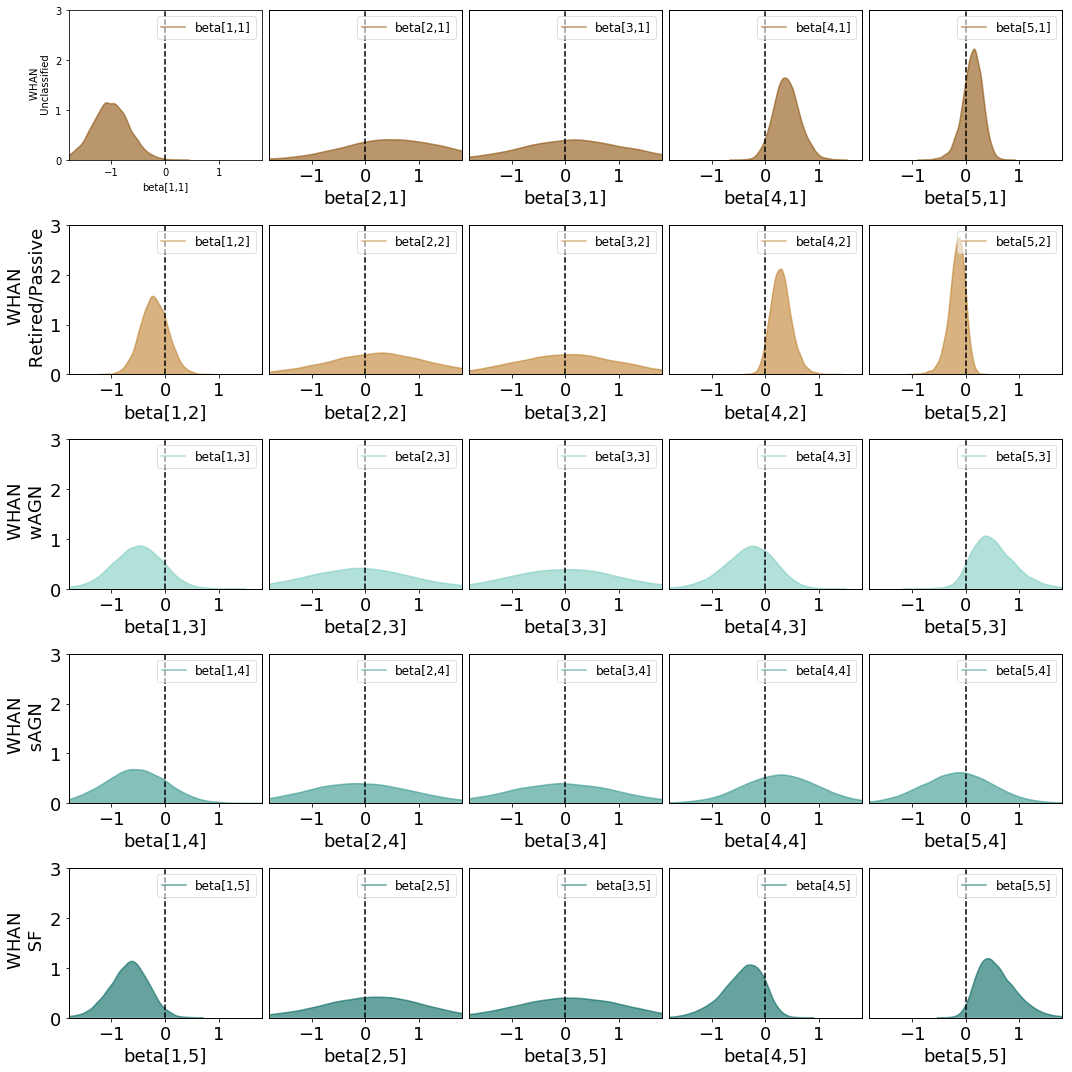

In [9]:
figsize = (15, 15)
alpha   = 0.6
plt.subplots(figsize=figsize)
position = 1
for each_beta in range(rows):
    for each_class in range(columns):
        name_temp = posteriors.columns.values.reshape(rows, columns)[each_beta,each_class]
        plot_temp = plt.subplot(rows, columns, position)
        sns.kdeplot(posteriors['%s' % str(name_temp)], shade=True, alpha=alpha, color=palette[each_beta])
        plt.axvline(x=0, linestyle="--", color='black')
        plt.rcParams.update(plotpars)
        plt.legend(loc='upper right')
        plt.xlabel(r"%s" % str(name_temp))
        plt.xlim([-1.8,1.8])
        plt.ylim([0,3.])
        if (each_class==0):
            plt.ylabel("$\,$ WHAN \n %s" % whan_classes[each_beta])       
        elif (each_class!=0): 
            plot_temp.yaxis.set_visible(False)            
        position+=1
plt.tight_layout(w_pad=0)
plt.savefig(os.path.join(figs_paper_path, '25betas_rmshared_revised.png'), bbox_inch='tight')
plt.savefig(os.path.join(figs_paper_path, '25betas_rmshared_revised.pdf'), bbox_inch='tight')
plt.show()

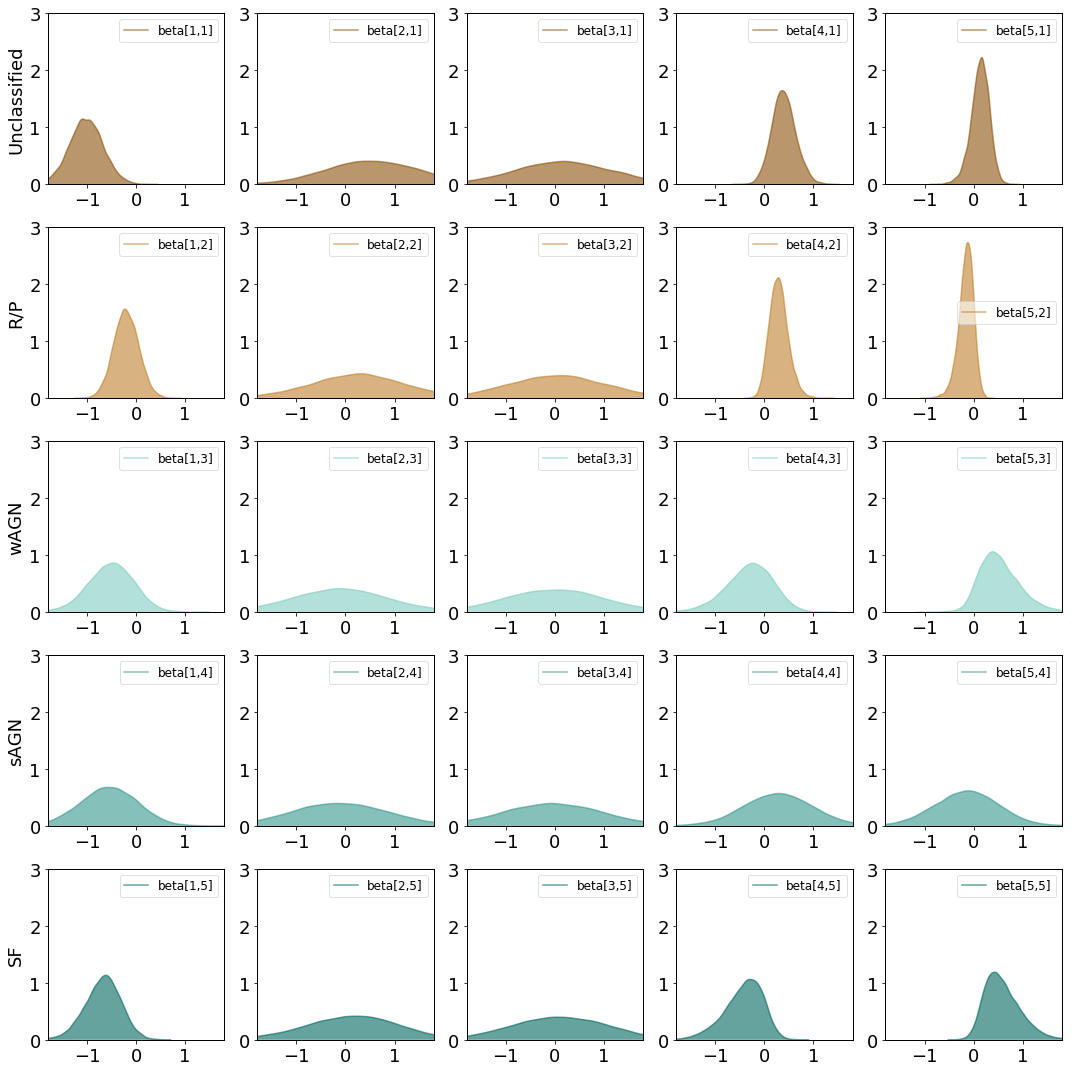

In [10]:
xlim = [-1.8, 1.8]
ylim = [0, 3.]
plt.subplots(figsize=figsize)

plt.subplot(5,5,1)
sns.kdeplot(posteriors['beta[1,1]'], shade=True, alpha=alpha, color=palette[0])
plt.ylabel("Unclassified")
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(5,5,2)
sns.kdeplot(posteriors['beta[2,1]'], shade=True, alpha=alpha, color=palette[0])
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(5,5,3)
sns.kdeplot(posteriors['beta[3,1]'], shade=True, alpha=alpha, color=palette[0])
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(5,5,4)
sns.kdeplot(posteriors['beta[4,1]'], shade=True, alpha=alpha, color=palette[0])
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(5,5,5)
sns.kdeplot(posteriors['beta[5,1]'], shade=True, alpha=alpha, color=palette[0])
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(5,5,6)
sns.kdeplot(posteriors['beta[1,2]'], shade=True, alpha=alpha, color=palette[1])
plt.ylabel("R/P")
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(5,5,7)
sns.kdeplot(posteriors['beta[2,2]'], shade=True, alpha=alpha, color=palette[1])
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(5,5,8)
sns.kdeplot(posteriors['beta[3,2]'], shade=True, alpha=alpha, color=palette[1])
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(5,5,9)
sns.kdeplot(posteriors['beta[4,2]'], shade=True, alpha=alpha, color=palette[1])
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(5,5,10)
sns.kdeplot(posteriors['beta[5,2]'], shade=True, alpha=alpha, color=palette[1])
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(5,5,11)
sns.kdeplot(posteriors['beta[1,3]'], shade=True, alpha=alpha, color=palette[2])
plt.ylabel("wAGN")
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(5,5,12)
sns.kdeplot(posteriors['beta[2,3]'], shade=True, alpha=alpha, color=palette[2])
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(5,5,13)
sns.kdeplot(posteriors['beta[3,3]'], shade=True, alpha=alpha, color=palette[2])
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(5,5,14)
sns.kdeplot(posteriors['beta[4,3]'], shade=True, alpha=alpha, color=palette[2])
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(5,5,15)
sns.kdeplot(posteriors['beta[5,3]'], shade=True, alpha=alpha, color=palette[2])
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(5,5,16)
sns.kdeplot(posteriors['beta[1,4]'], shade=True, alpha=alpha, color=palette[3])
plt.ylabel("sAGN")
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(5,5,17)
sns.kdeplot(posteriors['beta[2,4]'], shade=True, alpha=alpha, color=palette[3])
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(5,5,18)
sns.kdeplot(posteriors['beta[3,4]'], shade=True, alpha=alpha, color=palette[3])
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(5,5,19)
sns.kdeplot(posteriors['beta[4,4]'], shade=True, alpha=alpha, color=palette[3])
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(5,5,20)
sns.kdeplot(posteriors['beta[5,4]'], shade=True, alpha=alpha, color=palette[3])
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(5,5,21)
sns.kdeplot(posteriors['beta[1,5]'], shade=True, alpha=alpha, color=palette[4])
plt.ylabel("SF")
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(5,5,22)
sns.kdeplot(posteriors['beta[2,5]'], shade=True, alpha=alpha, color=palette[4])
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(5,5,23)
sns.kdeplot(posteriors['beta[3,5]'], shade=True, alpha=alpha, color=palette[4])
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(5,5,24)
sns.kdeplot(posteriors['beta[4,5]'], shade=True, alpha=alpha, color=palette[4])
plt.xlim(xlim)
plt.ylim(ylim)

plt.subplot(5,5,25)
sns.kdeplot(posteriors['beta[5,5]'], shade=True, alpha=alpha, color=palette[4])
plt.xlim(xlim)
plt.ylim(ylim)

plt.tight_layout()
plt.show()

In [11]:
posteriors_dictionary = {}
for i in range(posteriors.keys().size):
    posteriors_dictionary['%s' % (posteriors.keys()[i])] = posteriors.values[i]

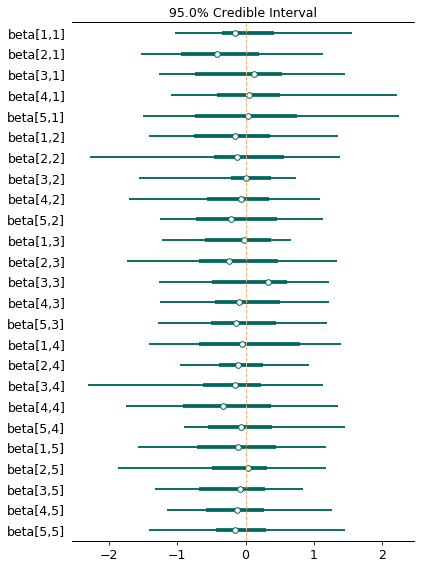

In [12]:
az.plot_forest(data=posteriors_dictionary, var_names=list(posteriors.keys()), figsize=(6,8), r_hat=False, n_eff=False,
               credible_interval=0.95, quartiles=True, colors=palette[-1])
plt.axvline(x=0, color='#fdae6b', linewidth=1., linestyle='--')
plt.tight_layout()
plt.savefig(os.path.join(figs_paper_path, '25betas_forest_rmshared_revised.png'))
plt.savefig(os.path.join(figs_paper_path, '25betas_forest_rmshared_revised.pdf'))
plt.show()

# FIT

In [13]:
all_files_dir = np.sort(os.listdir(results_path))

In [14]:
name = 'data_for_plotting'
print(len(name))

17


In [15]:
files_fit_to_plot = []
for i in range(all_files_dir.size):
    if all_files_dir[i][0:17]==name:
        files_fit_to_plot.append(all_files_dir[i])
    else:
        continue

In [16]:
files_fit_to_plot

['data_for_plotting_class1.csv',
 'data_for_plotting_class2.csv',
 'data_for_plotting_class3.csv',
 'data_for_plotting_class4.csv',
 'data_for_plotting_class5.csv']

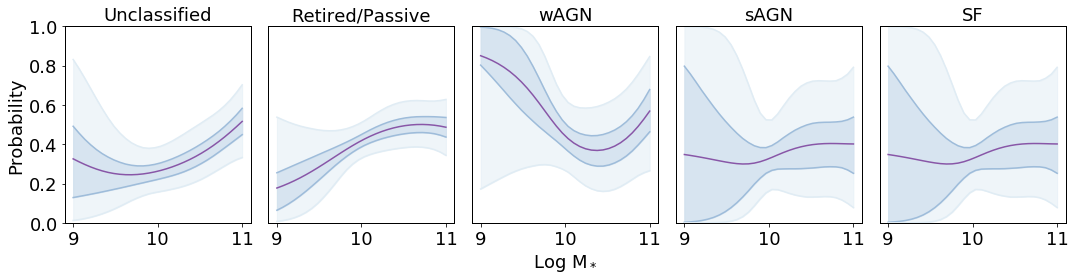

In [36]:
fit_palette = ['#e0ecf4','#9ebcda','#8856a7']
plt.subplots(figsize=(15,4))
for i in range(len(files_fit_to_plot)):        
    current_class = pd.read_csv(os.path.join(results_path, files_fit_to_plot[i]))
    plot_temp = plt.subplot(1, 5, (i+1))
    plt.plot(current_class['LOG_STELLAR_MASS'], current_class['mean'], '-', color=fit_palette[2]) 
    plt.plot(current_class['LOG_STELLAR_MASS'], current_class['25%'], '-', color=fit_palette[1])
    plt.plot(current_class['LOG_STELLAR_MASS'], current_class['75%'], '-', color=fit_palette[1])
    
    plt.fill_between(current_class['LOG_STELLAR_MASS'], current_class['25%'], current_class['75%'], 
                     color=fit_palette[1], alpha=0.5)
    
    plt.plot(current_class['LOG_STELLAR_MASS'], current_class['2.5%'], '-', color=fit_palette[0])
    plt.plot(current_class['LOG_STELLAR_MASS'], current_class['97.5%'], '-', color=fit_palette[0])
    plt.fill_between(current_class['LOG_STELLAR_MASS'], current_class['2.5%'], current_class['97.5%'], 
                     color=fit_palette[0], alpha=0.5)
    plt.title("%s" % (whan_classes[i]), fontsize=18)
    plt.rcParams.update(plotpars)
    plt.ylim([0., 1.])
    plt.xticks([9, 10, 11])
    if i==0:
        plt.ylabel('Probability')
    elif i>0:
        plot_temp.yaxis.set_visible(False)
        if i==2:
            plt.xlabel('Log $\mathrm{M_*}$')
        else:
            continue
        
    plt.tight_layout()
plt.savefig(os.path.join(figs_paper_path, 'mass_regression_meanZ.png'))
plt.savefig(os.path.join(figs_paper_path, 'mass_regression_meanZ.pdf'))
plt.show()